In [2]:
# Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import heatmap
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import log_loss

In [3]:
def display_confusion_matrix(y_true, y_pred_, colormap, classes):
    confusion = confusion_matrix(y_true, y_pred_)
    heatmap(np.transpose(confusion), annot=True, cmap=colormap, cbar=False, square=True, ax=plt.axes(), xticklabels = classes, yticklabels = classes, fmt='d')
    plt.xlabel('Classe Alvo')
    plt.ylabel('Classe Predita')

<h1> Análise do Dataset </h1>

In [4]:
df = pd.read_csv('spam.csv')

print(df.shape)

(5572, 2)


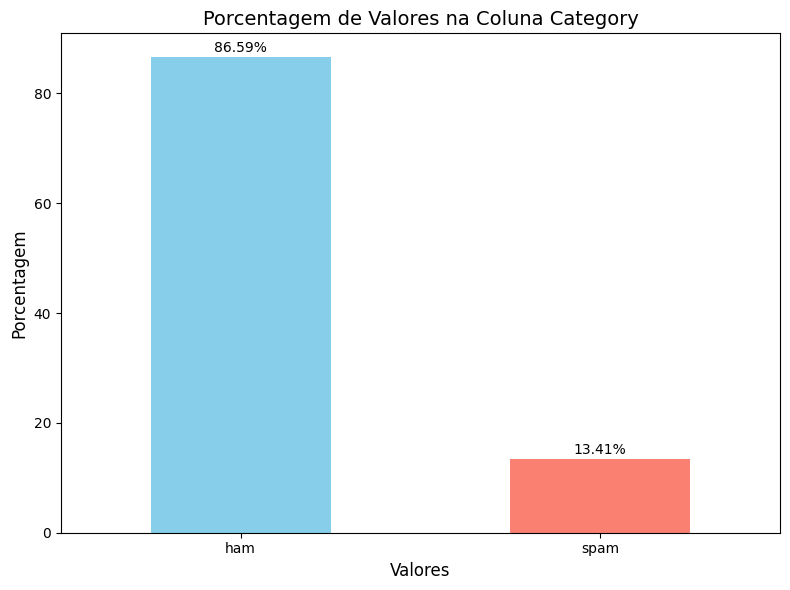

In [5]:
# VERIFICA BALANCEAMENTO
coluna = 'Category'

# Calculando as porcentagens
valores = df[coluna].value_counts(normalize=True) * 100

# Criando o gráfico de barras
plt.figure(figsize=(8, 6))
valores.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title(f'Porcentagem de Valores na Coluna {coluna}', fontsize=14)
plt.ylabel('Porcentagem', fontsize=12)
plt.xlabel('Valores', fontsize=12)
plt.xticks(rotation=0)
for i, v in enumerate(valores):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

In [6]:
# Convertendo as categorias para binárias (ham = 0, spam = 1)
df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})

# Transformar o texto em características (usando TF-IDF)
vectorizer = TfidfVectorizer(stop_words='english')  # Remover palavras comuns
X = vectorizer.fit_transform(df['Message'])
y = df['Category']

<h1> Divisão em Treinamento e Teste </h1>

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB(alpha=0.08, class_prior=[0.87,0.13])  # Ham: 0.87, Spam: 0.13
model.fit(X_train, y_train)

,alpha,0.08
,force_alpha,True
,fit_prior,True
,class_prior,"[0.87, 0.13]"


<h1> Resultados </h1>

In [8]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.94      0.96      0.95       149

    accuracy                           0.99      1115
   macro avg       0.97      0.98      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [9]:
# Acurácia no conjunto de treino
train_accuracy = model.score(X_train, y_train)

# Acurácia no conjunto de teste
test_accuracy = model.score(X_test, y_test)

print(f'Acurácia no treino: {train_accuracy}')
print(f'Acurácia no teste: {test_accuracy}')

Acurácia no treino: 0.9984294368409243
Acurácia no teste: 0.9865470852017937


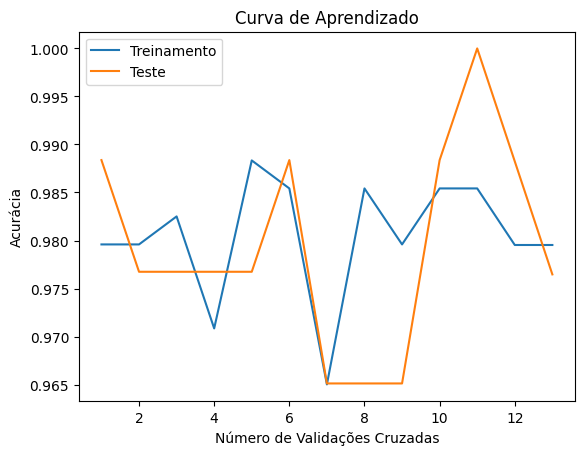

Acurácia média da validação cruzada do treinamento: 0.9804797183959373
Acurácia média da validação cruzada do teste: 0.9793959802167737


In [10]:
# Validar o modelo usando validação cruzada
train_scores = cross_val_score(model, X_train, y_train, cv=13, scoring='accuracy')
test_scores = cross_val_score(model, X_test, y_test, cv=13, scoring='accuracy')

plt.plot(range(1, len(train_scores) + 1), train_scores, label='Treinamento')
plt.plot(range(1, len(test_scores) + 1), test_scores, label='Teste')
plt.xlabel('Número de Validações Cruzadas')
plt.ylabel('Acurácia')
plt.legend()
plt.title('Curva de Aprendizado')
plt.show()

print(f'Acurácia média da validação cruzada do treinamento: {train_scores.mean()}')
print(f'Acurácia média da validação cruzada do teste: {test_scores.mean()}')

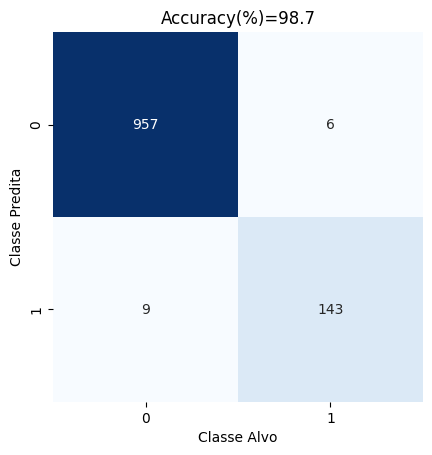

In [11]:
y_pred =  model.predict(X_test)
plt.figure()
display_confusion_matrix(y_test, y_pred, 'Blues', set(y_test))
plt.title('Accuracy(%)={:.1f}'.format(100*accuracy_score(y_test,y_pred)))
plt.show()

In [12]:
y_prob = model.predict_proba(X_test)

# Calcular a perda logarítmica
loss = log_loss(y_test, y_prob)
print(f'Perda Logarítmica (Log Loss): {loss}')

Perda Logarítmica (Log Loss): 0.060360307345899984
